- Here in this project we will do a data analytics related to some geo data and show some interesting insights for different seasons.

- **Here is a step by step approach for the data analytics followed to obtain the end plot with 4 seasons anamolies.**  
    - First Load the data and use delim white space as a separator and recognize the na_values and also drop the unwanted row which has all the dashes.
    - Next address the Na values and replace them with a '0' so that we can wprk on them later.
    - Also we have created a new column called Estimtes which is an average of TMIN and TMAX to hanlde the missing values in TAVG so where ever the TAVG is missing we will place the estimates there and even after that if the TAVG values are missing then we drop them to avoid the data misleading.
    - Also we create new columns using the DATE column namely Month column and Year column for splitting the data into different seasons and also to check the changes for different years.
    - Then we take the seasonal average temperatures for every year as "TAVG" and subtract "ref_temp" from it. where "ref_temp" is the seasonal average temperature values for the period of 1951 to 1980 and get the difference values as a new column called as diff.
    - Finally plot all the 4 plots using matplot lib and subplots with respective legends and labels.  

In [1]:
#Loading the data using a data_path and also using the inbuilt pandas function read_csv we read the file.
import pandas as pd
import numpy as np
from numpy import NaN
data_path = "data/2315676.txt"
#here we are setting up the data path and also delim whatie space which takes white space as separator and 
# na_values we are setting as -9999
data = pd.read_csv(data_path, delim_whitespace=True, na_values= ["-9999"])
#here we drop the 1st column which has all dashes.
data=data.drop(index=0)
data

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2,-37
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6,-26
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7,-27
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3,-27
5,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4,-36
...,...,...,...,...,...,...
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,47,51,NaN
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,43,47,37
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,42,NaN,37
41064,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,45,46,43


In [2]:
#here I am trying to get a description of the data.
data.describe()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
count,41065,41065,41065,21222,40296,39119
unique,1,1,41065,122,131,123
top,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,33,33,33
freq,41065,41065,1,579,1188,1073


In [3]:
#here we are replacing the NaN values with zero so that we can work on with the the column by converting it as int dtype. 
data[["TMAX", "TMIN"]]= data[["TMAX","TMIN"]].fillna(0)
data[["TMAX","TMIN"]]=data[["TMAX","TMIN"]].astype('int')
# data[['TMAX', 'TMIN']] = data[['TMAX', 'TMIN']] .astype(str).astype(int)
data["estimates"] = (data["TMAX"]+data["TMIN"])*0.5


In [4]:
#here we are replacing the TAVG missing values with estimates values  
data["TAVG"] =data["TAVG"].fillna(data["estimates"])
data["TAVG"] = data["TAVG"].astype('int')
#here we are finding the values in TAVG which are still missing even after the replacement with estimates and we drop them. I found them by checking if the TAVG 
# and TMIN and TMAX are all 0 which was basically due to replaced by the na values replacement above in TMIN and TMAX.so if they are 0 and TAVG is 0 then they 
# are the missing values to be dropped fro avoiding the misleading data.    
rows = data[(data["TAVG"]==0)&((data["TMAX"]==0)|(data["TMIN"]==0))].index
data = data.drop(rows)

In [5]:
#Here we are declaring a function to convert the temperature from fahrenheit to celsius 
def fahr_to_celsius(temp_fahrenheit):
    """ Function to convert Fahrenheit temperature into Celsius."""
    converted_temp = (temp_fahrenheit - 32) / 1.8
    return converted_temp 

In [6]:
#here we are applying the above declared funtion to the temoerature values.
data[["TAVG","TMAX","TMIN","estimates"]] = data[["TAVG","TMAX","TMIN","estimates"]].apply(fahr_to_celsius)
data

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,estimates
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-27.222222,-16.666667,-38.333333,-27.500000
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-23.333333,-14.444444,-32.222222,-23.333333
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-23.333333,-13.888889,-32.777778,-23.333333
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-26.111111,-19.444444,-32.777778,-26.111111
5,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-26.666667,-15.555556,-37.777778,-26.666667
...,...,...,...,...,...,...,...
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,8.333333,10.555556,-17.777778,-3.611111
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,6.111111,8.333333,2.777778,5.555556
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,5.555556,-17.777778,2.777778,-7.500000
41064,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,7.222222,7.777778,6.111111,6.944444


<font color='red'>**From Here we will split the data according to seasons so we create 4 data frames for different seasons, namely Summer, Winter, Spring, Autumn.**</font>

<font color='blue'> **Also, we will create their respective average temperature related data frames for working on them later using joins.**</font>

In [7]:
# here we are slicing the DATE string into month and year and create them as new columns to help us deal iwth the data for Seasons.
data["month"]= data["DATE"].str.slice(start=4, stop=6)
data["year"] = data["DATE"].str.slice(start=0, stop=4)

#here we are using the month columns values in condition statemnts and create new data sets related 
# to those specific seasons. so that we can work on them separately and plot them accordingly. 
Winter = data[(data["month"]=='12')|(data["month"]=='01')|(data["month"]=='02')]
# print(Winter)
Spring = data[(data["month"]=='03')|(data["month"]=='04')|(data["month"]=='05')]
# print(Spring)
Summer = data[(data["month"]=='06')|(data["month"]=='07')|(data["month"]=='08')]
Autumn = data[(data["month"]=='09')|(data["month"]=='10')|(data["month"]=='11')]

print("Winter:",Winter.shape,"\nSpring:",Spring.shape,"\nSummer:",Summer.shape, "\nAutumn:",Autumn.shape)


Winter: (10153, 9) 
Spring: (10351, 9) 
Summer: (10393, 9) 
Autumn: (10153, 9)


In [8]:
#here we are grouping the data by the year and taking the mean values of that season and as aprt we get Refernce temoerature for each season in different year.
Summer_Averages = Summer.groupby("year").mean().reset_index()
#But since we have unwanted columns here like TMIN mean and TMAX mean and estimates mean so we are dropping those unwanted columns from the seasonal average data sets. 
Summer_Averages=Summer_Averages.drop(["estimates","TMIN","TMAX"], axis=1)

Winter_Averages = Winter.groupby("year").mean().reset_index()
Winter_Averages=Winter_Averages.drop(["estimates","TMIN","TMAX"], axis=1)

Spring_Averages = Spring.groupby("year").mean().reset_index()
Spring_Averages=Spring_Averages.drop(["estimates","TMIN","TMAX"], axis=1)

Autumn_Averages = Autumn.groupby("year").mean().reset_index()
Autumn_Averages=Autumn_Averages.drop(["estimates","TMIN","TMAX"], axis=1)



In [9]:
#here we are selecting the data from the afore mentioned period ie from 1950 to 1980 only.

Summer_1951_1980 = Summer[(Summer["year"]>'1950')&(Summer["year"]<'1981')]
Winter_1951_1980 = Winter[(Winter["year"]>'1950')&(Winter["year"]<'1981')]
Spring_1951_1980 = Spring[(Spring["year"]>'1950')&(Spring["year"]<'1981')]
Autumn_1951_1980 = Autumn[(Autumn["year"]>'1950')&(Autumn["year"]<'1981')]

# print(
# Summer_1951_1980.head()
# print(Summer_1951_1980)
summer_ref_temp = Summer_1951_1980.TAVG.mean()
winter_ref_temp = Winter_1951_1980.TAVG.mean()
spring_ref_temp = Spring_1951_1980.TAVG.mean()
autumn_ref_temp = Autumn_1951_1980.TAVG.mean()
print(summer_ref_temp,winter_ref_temp,spring_ref_temp,autumn_ref_temp)

#here we are dropping off the unwanted columns from the df. 
Summer=Summer.drop(["STATION","STATION_NAME","TMAX","TMIN","estimates","month", "TAVG"], axis=1)
Winter=Winter.drop(["STATION","STATION_NAME","TMAX","TMIN","estimates","month", "TAVG"], axis=1)
Spring=Spring.drop(["STATION","STATION_NAME","TMAX","TMIN","estimates","month", "TAVG"], axis=1)
Autumn=Autumn.drop(["STATION","STATION_NAME","TMAX","TMIN","estimates","month", "TAVG"], axis=1)

#here we are merging the two data frames ie the reference temperatures for that seasons with the TAVG values for the 4 seasons.

Summer = Summer_Averages
Winter = Winter_Averages
Spring = Spring_Averages
Autumn = Autumn_Averages

Summer["ref_temp"] = summer_ref_temp
Winter["ref_temp"] = winter_ref_temp
Spring["ref_temp"] = spring_ref_temp
Autumn["ref_temp"] = autumn_ref_temp


12.34500805152979 -13.568936502072814 -2.3851234344166565 -0.856642644843451


In [10]:
seasons = [Summer,Winter,Spring,Autumn]
#here we are creating a new data frame for plotting the anamolies.
for i, item in enumerate(seasons):
    item["diff"] = item["TAVG"]-item["ref_temp"]

anamolies_summer = Summer
anamolies_winter = Winter
anamolies_spring = Spring
anamolies_autumn = Autumn
print(anamolies_summer)


     year       TAVG   ref_temp      diff
0    1908  11.014493  12.345008 -1.330515
1    1909  11.702899  12.345008 -0.642110
2    1910   9.993961  12.345008 -2.351047
3    1911  10.972222  12.345008 -1.372786
4    1912  10.772947  12.345008 -1.572061
..    ...        ...        ...       ...
108  2016  13.653382  12.345008  1.308374
109  2017  12.415459  12.345008  0.070451
110  2018  14.927536  12.345008  2.582528
111  2019  12.705314  12.345008  0.360306
112  2020  14.438339  12.345008  2.093331

[113 rows x 4 columns]


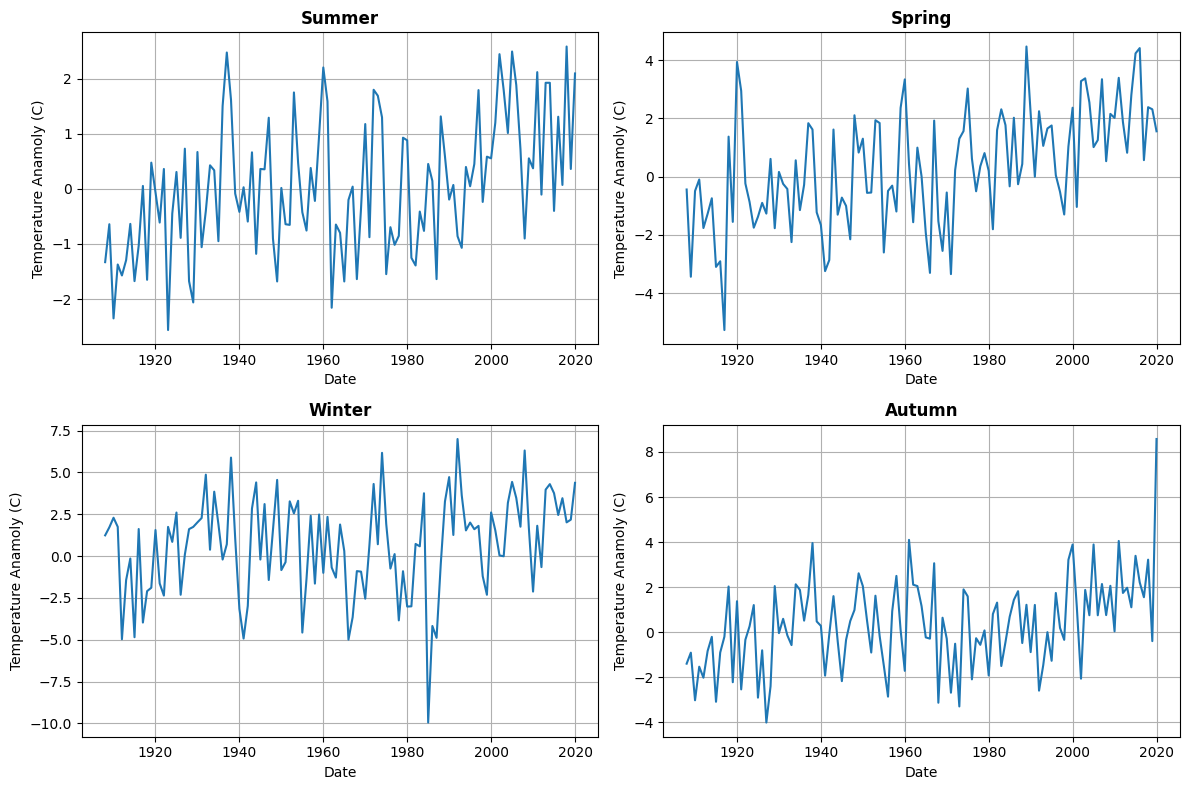

In [11]:
#here I am importing the libraries related to plotting from matplotlib.
import matplotlib.pyplot as plt
#here we are creating subplots which are 2x2 graphs in the frameand using figsize we define the size of the graphs.
fig, ax = plt.subplots(2, 2, figsize=(12,8))
#since we have 100 plus tick values on the x axis it is better to reduce them so that they dont overlap. so we are making them using np.array and float
# we are plotting the summer on left top so we write it as [0,0]
#similarly spring on top right and winter on bottom left and Autumn on bottom right.
ax[0, 0].plot(np.asarray(anamolies_summer["year"], float), anamolies_summer["diff"]) #row=0, col=0
ax[1, 0].plot(np.asarray(anamolies_winter["year"], float), anamolies_winter["diff"]) #row=1, col=0
ax[0, 1].plot(np.asarray(anamolies_spring["year"], float), anamolies_spring["diff"]) #row=0, col=1
ax[1, 1].plot(np.asarray(anamolies_autumn["year"], float), anamolies_autumn["diff"]) #row=1, col=1
#here we are setiing the titles and labels for every subplot.
ax[0, 0].set_title('Summer', 
             fontweight ="bold")
ax[0,0].set_xlabel('Date')
ax[0,0].set_ylabel('Temperature Anamoly (C)')
ax[1, 0].set_title('Winter', 
             fontweight ="bold")
ax[0,1].set_xlabel('Date')
ax[0,1].set_ylabel('Temperature Anamoly (C)')
ax[0, 1].set_title('Spring', 
             fontweight ="bold")
ax[1,0].set_xlabel('Date')
ax[1,0].set_ylabel('Temperature Anamoly (C)')
ax[1, 1].set_title('Autumn', 
             fontweight ="bold")
ax[1,1].set_xlabel('Date')
ax[1,1].set_ylabel('Temperature Anamoly (C)')
#heree usingthe grid() we can create the graph look a like lines on the plot.
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()
#using a tight_layout we can plot the subplot very neatly rather than having any overlaps or different spacings.
plt.tight_layout()
plt.show()